In [111]:
import numpy as np
from DG_classes import *
from DiffusionGeometry import *
import matplotlib.pyplot as plt
from DG_ml_stats import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from visualisation import *
from gtda.homology import VietorisRipsPersistence
from ripser import ripser
import time

In [5]:
R = 2
r = 1
parameters = {}
parameters['ep'] = 0.3
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2
parameters['n0'] = 35
parameters['n1'] = 10
parameters['n2'] = 4


DG_sizes = []
PH_sizes = []

sizes = [400,800,1200,1600,2000,3000,4000,6000,8000,12000,20000]

for n in sizes:

    print('Computing for size', n)

    DG_runs = []
    PH_runs = []

    for run in range(20):

        angle = np.linspace(0, 2*np.pi, 32)
        theta, phi = np.random.uniform(0, 2*np.pi, n), np.random.uniform(0, 2*np.pi, n)
        X = (R + r * np.cos(phi)) * np.cos(theta)
        Y = (R + r * np.cos(phi)) * np.sin(theta)  
        Z = r * np.sin(phi)
        data = np.stack((X,Y,Z), axis = 1)

        t0 = time.time()
        DG_class = DG(data, parameters)
        L1, U1 = DG_class.weak_eigenproblem_1(DG_class.D1())
        t1 = time.time()
        DG_runs.append(t1-t0)

        if n <= 3000:
            t0 = time.time()
            dgms = ripser(data)['dgms']
            t1 = time.time()
            PH_runs.append(t1-t0)
    
    DG_sizes.append(DG_runs)
    PH_sizes.append(PH_runs)

Computing for size 400
Computing for size 800
Computing for size 1200
Computing for size 1600
Computing for size 2000
Computing for size 3000
Computing for size 4000
Computing for size 6000
Computing for size 8000
Computing for size 12000
Computing for size 20000


Add a PH test at n = 3500.

In [6]:
PH_sizes_2 = []

R = 2
r = 1

for n in [3500]:

    # print('Computing for size', n)

    # DG_runs = []
    PH_runs = []

    for run in range(20):

        angle = np.linspace(0, 2*np.pi, 32)
        theta, phi = np.random.uniform(0, 2*np.pi, n), np.random.uniform(0, 2*np.pi, n)
        X = (R + r * np.cos(phi)) * np.cos(theta)
        Y = (R + r * np.cos(phi)) * np.sin(theta)  
        Z = r * np.sin(phi)
        data = np.stack((X,Y,Z), axis = 1)

        # t0 = time.time()
        # DG_class = DG(data, parameters)
        # L1, U1 = DG_class.weak_eigenproblem_1(DG_class.D1())
        # t1 = time.time()
        # DG_runs.append(t1-t0)

        # if n <= 3000:
        t0 = time.time()
        dgms = ripser(data)['dgms']
        t1 = time.time()
        PH_runs.append(t1-t0)
        print(run, t1-t0)
    
    # DG_sizes.append(DG_runs)
    PH_sizes_2.append(PH_runs)

PH_3500_data = np.array(PH_sizes_2)

0 45.23134803771973
1 80.66074013710022
2 150.3298523426056
3 53.460684061050415
4 50.810627937316895
5 230.75090193748474
6 67.37943196296692


In [99]:
PH_3500_data = np.array([45.23134803771973, 80.66074013710022, 53.460684061050415, 50.810627937316895, 67.37943196296692])

In [ ]:
DG_data = np.array(DG_sizes)
PH_data = np.array(PH_sizes[:6])

np.save('DG_runtime_data', DG_data)
np.save('PH_runtime_data', PH_data)

In [4]:
DG_data = np.load('DG_runtime_data.npy')
PH_data = np.load('PH_runtime_data.npy')
sizes_DG = [400,800,1200,1600,2000,3000,4000,6000,8000,12000,20000]
sizes_PH = [400,800,1200,1600,2000,3000,3500]

Mask out the erroneous runtime values and plot the mean and std bars.

/Users/iolo/anaconda3/envs/ML/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


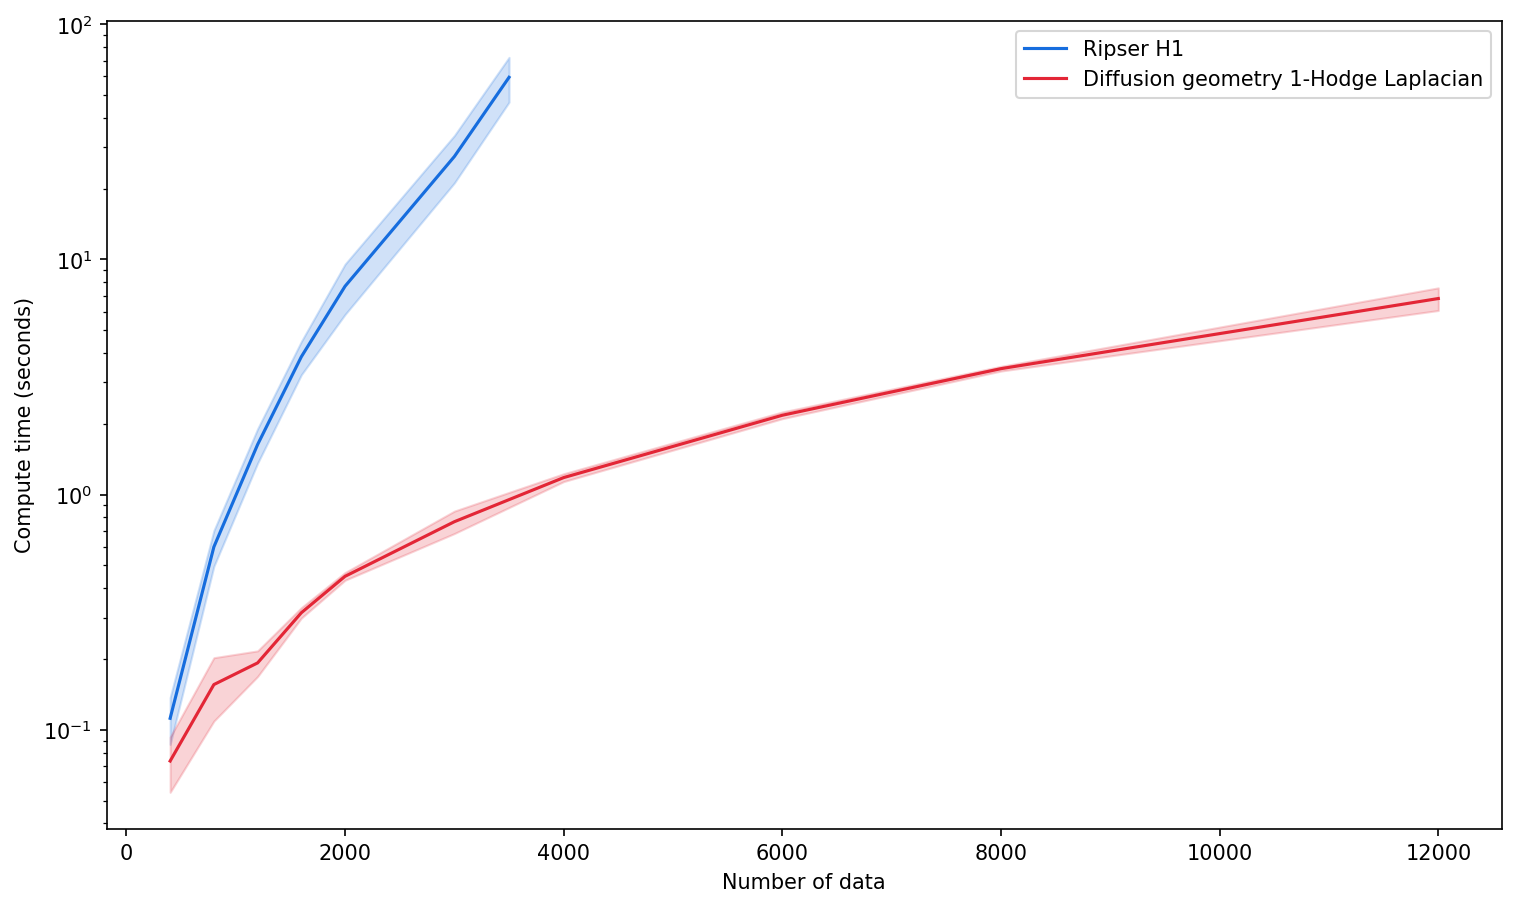

In [112]:
DG_data = np.ma.array(DG_data, mask = DG_data > 2*np.median(DG_data, axis = 1).reshape(-1,1))
PH_data = np.ma.array(PH_data, mask = PH_data > 2*np.median(PH_data, axis = 1).reshape(-1,1))
DG_variable_sizes_data = np.ma.array(DG_variable_sizes_data, mask = DG_variable_sizes_data > 2*np.median(DG_variable_sizes_data, axis = 1).reshape(-1,1))

DG_data_mean = np.mean(DG_data, axis = 1).data
DG_data_std = DG_data.std(axis = 1).data
PH_data_mean = np.mean(PH_data, axis = 1).data
PH_data_std = PH_data.std(axis = 1).data
PH_data_mean = np.append(PH_data_mean, PH_3500_data.mean())
PH_data_std = np.append(PH_data_std, PH_3500_data.std())

DG_variable_sizes_data_mean = np.mean(DG_variable_sizes_data, axis = 1).data
DG_variable_sizes_data_std = DG_variable_sizes_data.std(axis = 1).data

fig, ax = plt.subplots(figsize = (12,7), dpi = 150)

ax.plot(sizes_PH, PH_data_mean, color = "#166dde", label = "Ripser H1")
ax.fill_between(sizes_PH, PH_data_mean-PH_data_std, PH_data_mean+PH_data_std, color = "#166dde", alpha=0.2)

limit = -1
ax.plot(sizes_DG[:limit], DG_data_mean[:limit], color = "#e32636", label = "Diffusion geometry 1-Hodge Laplacian")
ax.fill_between(sizes_DG[:limit], DG_data_mean[:limit]-DG_data_std[:limit], DG_data_mean[:limit]+DG_data_std[:limit], color = "#e32636", alpha=0.2)

ax.set_xlabel('Number of data')
ax.set_ylabel('Compute time (seconds)')
ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')

How much slower is PH than DG?

[1.6270875171791985 4.231086716353094 8.578351111896843 12.280281717930757
 17.179742825876588 33.22662129890267]


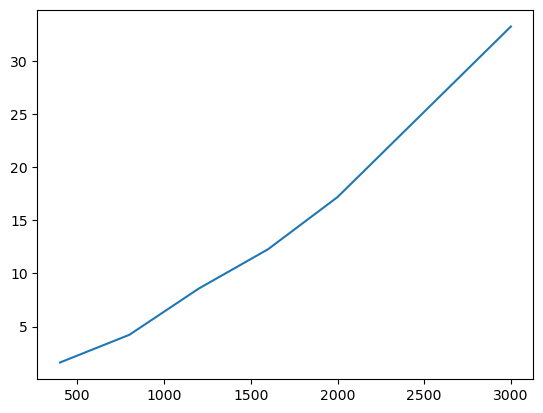

In [115]:
scale_diff = (PH_data/DG_data[:6]).mean(axis=1)
plt.plot(sizes_PH[:6], scale_diff)
print(scale_diff)

In [65]:
plot_quiver_plain_3d(2*U1[:,0], 0.8, 0, DG_class)